In [57]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import transformers
import numpy.typing as npt

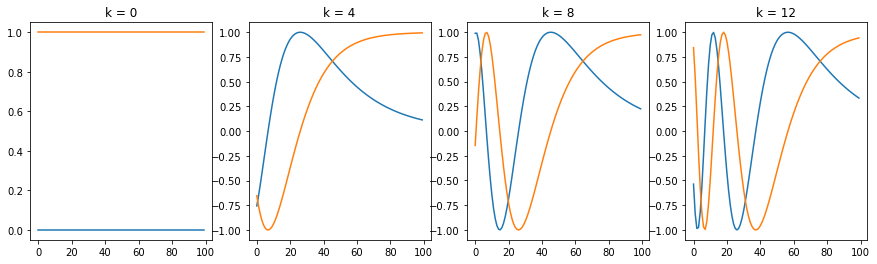

In [61]:
def plotSinusoid(k, d=512, n=10000, sinosoid=np.sin):
    x = np.arange(0, 100, 1)
    denominator = np.power(n, 2*x/d)
    y = sinosoid(k/denominator)
    plt.plot(x, y)
    plt.title('k = ' + str(k))
 
fig = plt.figure(figsize=(15, 4))    
for i in range(4):
    plt.subplot(141 + i)
    plotSinusoid(i*4)
    plotSinusoid(i*4, sinosoid=np.cos)

In [80]:
# positional encoding
def get_angle(pos: np.array, i: np.array, d: int, n: int = 10**4) -> np.array:
    divisor = np.power(n, 2*i/d)
    angles = pos/divisor
    return angles
    
#example
positions = 4
dmodel = 8
pos = np.arange(0, positions, 1)[:, np.newaxis]
i = np.arange(0, dmodel/2, 1)
get_angle(pos, i, dmodel, n = 10000)

array([[0.e+00, 0.e+00, 0.e+00, 0.e+00],
       [1.e+00, 1.e-01, 1.e-02, 1.e-03],
       [2.e+00, 2.e-01, 2.e-02, 2.e-03],
       [3.e+00, 3.e-01, 3.e-02, 3.e-03]])

In [100]:
def get_positional_encoding(t_length, dmodel):
    pos = np.arange(0, t_length, 1)[:, np.newaxis]
    i = np.arange(0, dmodel/2, 1)
    angles = get_angle(pos, i, dmodel)
    pe = np.zeros((t_length, dmodel))
    #even
    pe[:, ::2] = np.sin(angles)
    #odd
    pe[:, 1::2] = np.cos(angles)
    return pe

get_positional_encoding(10, 4)
    

array([[ 0.        ,  1.        ,  0.        ,  1.        ],
       [ 0.84147098,  0.54030231,  0.00999983,  0.99995   ],
       [ 0.90929743, -0.41614684,  0.01999867,  0.99980001],
       [ 0.14112001, -0.9899925 ,  0.0299955 ,  0.99955003],
       [-0.7568025 , -0.65364362,  0.03998933,  0.99920011],
       [-0.95892427,  0.28366219,  0.04997917,  0.99875026],
       [-0.2794155 ,  0.96017029,  0.05996401,  0.99820054],
       [ 0.6569866 ,  0.75390225,  0.06994285,  0.997551  ],
       [ 0.98935825, -0.14550003,  0.07991469,  0.99680171],
       [ 0.41211849, -0.91113026,  0.08987855,  0.99595273]])

In [119]:
# making input 0 to -infinity as it doesn't effect softmax
def create_mask(seq):
    return tf.cast(tf.math.equal(seq, 0), tf.float32)

x = tf.constant([[23,0, 3, 2, 0], [0, 3, 4, 0, 0], [0, 3, 2, 3, 0]], dtype=tf.float32)
print(tf.keras.activations.softmax(x))
print(tf.keras.activations.softmax(x + create_mask(x) * -1.0e9))

tf.Tensor(
[[1.00000000e+00 1.02618795e-10 2.06115369e-09 7.58256014e-10
  1.02618795e-10]
 [1.28727155e-02 2.58555412e-01 7.02826440e-01 1.28727155e-02
  1.28727155e-02]
 [2.01775115e-02 4.05276120e-01 1.49092749e-01 4.05276120e-01
  2.01775096e-02]], shape=(3, 5), dtype=float32)
tf.Tensor(
[[1.0000000e+00 0.0000000e+00 2.0611537e-09 7.5825601e-10 0.0000000e+00]
 [0.0000000e+00 2.6894143e-01 7.3105860e-01 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 4.2231882e-01 1.5536241e-01 4.2231882e-01 0.0000000e+00]], shape=(3, 5), dtype=float32)


In [135]:
def create_look_ahead_mask(size):
    return np.tri(size)

create_look_ahead_mask(3)

array([[1., 0., 0.],
       [1., 1., 0.],
       [1., 1., 1.]])

In [138]:
def scaled_dot_product_attention(q, k, v, mask):
    x = tf.constant([[2, 3],
                     [1, 4]])
    y = tf.constant([[3, 2],
                     [4, 1]])
    return tf.matmul(x, y)
scaled_dot_product_attention(1, 1, 1, 1)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[18,  7],
       [19,  6]], dtype=int32)>